In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
#create the data
Nclass = 500

In [107]:
x1 = np.random.randn(Nclass, 2) + np.array([0, -2])
x2 = np.random.randn(Nclass, 2) + np.array([2, 2])
x3 = np.random.randn(Nclass, 2) + np.array([-2, 2])

In [108]:
X = np.vstack([x1, x2, x3])

In [109]:
Y = np.array([0] * Nclass + [1] * Nclass + [2] * Nclass)

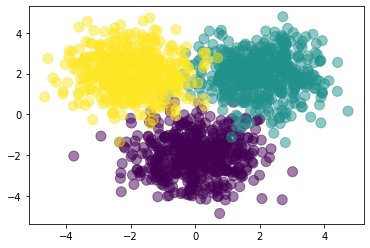

In [110]:
# Lets plot the point and see what it looks like
plt.scatter(X[:, 0 ], X[:, 1], c = Y, s = 100, alpha = 0.5)
plt.show()

In [111]:
#randomly initialize weights
D = 2 #dimensionality of input
M = 3 #hidden layer size
K = 3 #number of classes

In [112]:
W1 = np.random.randn(D, K)
b1 = np.random.randn(M) #size of M

In [113]:
W1

array([[-0.2635734 ,  1.39178264, -0.66306045],
       [-0.19789296, -1.18994153,  1.42519036]])

In [114]:
b1

array([ 0.33542279, -0.6699845 ,  0.0867976 ])

In [115]:
W2 = np.random.randn(M, K)
b2 = np.random.randn(K) #size of K

In [116]:
W2

array([[ 0.05914288, -0.66582693,  0.05720681],
       [-0.79327819,  0.36947506, -1.12345615],
       [-1.32055105,  2.19875668, -0.30717703]])

In [117]:
b2

array([-0.92817462,  1.06361221, -0.72787977])

In [118]:
#forward action
def forward(X, W1, b1, W2, b2):
    Z = 1/(1 + np.exp(X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims = True)
    return Y, Z

In [119]:
#determine the classification rate
# num correct / num total

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [120]:
#main function
N = len(Y)
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

In [121]:
def cost(T, Y):
    t = T * np.log(Y)
    return t.sum()

In [122]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1]
    
    #slow
   # ret1 = np.zeros((M, K))
   # for n in range(N):
   #     for m in range(M):
   #         for k in range(K):
   #             ret1[m, k] += (T[n,k] - Y[n, k])*Z[n,m]


    # a bit faster -let's not loop over m
    ret2 = np.zeros((M, K))
    for n in range(N):
        for k in range(K):
            ret2[:, k] += (T[n, k] - Y [n,k])*Z[n, :]
    #assert(np.abs(ret1 - ret2).sum() < 10e-10)
    # even faster -let's not loop over k either
    ret3 = np.zeros((M, K))
    for n in range(N):
        ret3 += np.outer(Z[n], T[n] - Y[n])
    #assert(np.abs(ret2 - ret3).sum() < 10e-10)
    
    
    #faster -let's not lop over anything
    ret4 = Z.T.dot(T - Y)  #(Z.T)--to be M by N(M/N) & (T-Y)-- to be N by K(N/K)
    assert(np.abs(ret4 - ret3).sum() < 10e-10)
        
    return ret4

In [123]:
def derivative_b2(T, Y):
    return(T - Y).sum(axis = 0)

In [124]:
def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape
    
    #slow
    #ret1 = np.zeros((D, M))
    #for n in range(N):
    #    for k in range(K):
    #        for m in range(M):
    #            for d in range(D):
    #                ret1[d, m] += (T[n, k] - Y[n, k])*W2[m, k]*Z[n, m]*(1 - Z[n ,m])*X[n,d]
    #return ret1
    
    dz = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 =  X.T.dot(dz)
    
    return ret2

In [125]:
def derivative_b1(T, Y, W2, Z):
    return ((T -Y).dot(W2.T) * Z * (1- Z)).sum(axis=0)

In [126]:
learning_rate = 10e-7

In [127]:
costs = []

In [128]:
for epoch in range(100000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output) #cost
        P = np.argmax(output, axis = 1)
        r = classification_rate(Y, P) #classification rate
        print("cost:", c, "classification_rate:", r)
        costs.append(c)

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 classification_rate: 0.3333333333333333
cost: -4078.921357350778 

In [129]:
#this is gradient ascent, not descent
#be comfortable with both
#new Weight 

W2 += learning_rate * derivative_w2(hidden, T, output)
b2 += learning_rate * derivative_b2(T, output)
W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
b1 += learning_rate * derivative_b1(T, output, W2, hidden)

In [130]:
W2

array([[ 0.05934452, -0.66625364,  0.05743187],
       [-0.79326164,  0.36901513, -1.12301277],
       [-1.32011057,  2.19831494, -0.30717576]])

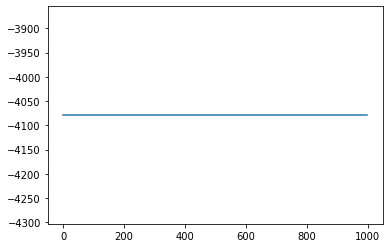

In [131]:
plt.plot(costs)
plt.show()